<a href="https://colab.research.google.com/github/eeeewn/IBM2022/blob/main/health_yyw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")

display(health.head()) 
print(health.info())

Mounted at /content/drive


,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD__DT
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HCHK_YEAR          10000 non-null  int64  
 1   IDV_ID             10000 non-null  int64  
 2   SIDO               10000 non-null  int64  
 3   SEX                10000 non-null  object 
 4   AGE_GROUP          10000 non-null  int64  
 5   HEIGHT             10000 non-null  int64  
 6   WEIGHT             10000 non-null  int64  
 7   WAIST              10000 non-null  float64
 8   SIGHT_LEFT         10000 non-null  float64
 9   SIGHT_RIGHT        10000 non-null  float64
 10  HEAR_LEFT          10000 non-null  int64  
 11  HEAR_RIGHT         10000 non-null  int64  
 12  BP_HIGH            9912 non-null   float64
 13  BP_LWST            9912 non-null   float64
 14  BLDS               9912 non-null   float64
 15  TOT_CHOLE          4044 non-null   float64
 16  TRIGLYCERIDE       4044

In [ ]:
#display(health.isna().sum())
print(health.isnull().sum())

HCHK_YEAR               0
IDV_ID                  0
SIDO                    0
SEX                     0
AGE_GROUP               0
HEIGHT                  0
WEIGHT                  0
WAIST                   0
SIGHT_LEFT              0
SIGHT_RIGHT             0
HEAR_LEFT               0
HEAR_RIGHT              0
BP_HIGH                88
BP_LWST                88
BLDS                   88
TOT_CHOLE            5956
TRIGLYCERIDE         5956
HDL_CHOLE            5956
LDL_CHOLE            6023
HMG                    88
OLIG_PROTE_CD         139
CREATININE             88
SGOT_AST               88
SGPT_ALT               88
GAMMA_GTP              88
SMK_STAT_TYPE_CD        2
DRK_YN                  1
HCHK_OE_INSPEC_YN       0
CRS_YN               6749
TTR_YN               6749
DATA_STD__DT            0
dtype: int64


#흡연 여부별


In [3]:
smk=health.groupby('SMK_STAT_TYPE_CD', as_index = False).agg(n = ('SMK_STAT_TYPE_CD', 'count'))
smk

,SMK_STAT_TYPE_CD,n
0,No,6231
1,NotNow,1926
2,Yes,1841


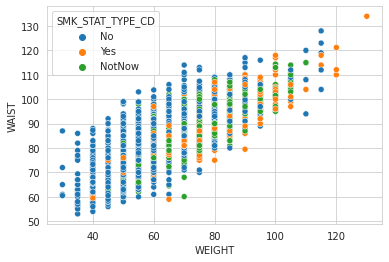

In [ ]:
#몸무게와 허리 둘레
sns.scatterplot(data = health, x = 'WEIGHT', y = 'WAIST', hue='SMK_STAT_TYPE_CD')

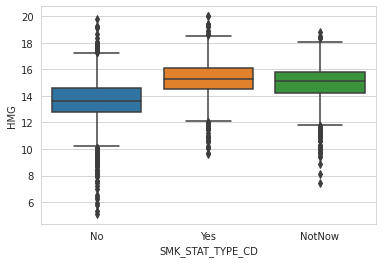

In [7]:
sns.boxplot(data = health, x = 'SMK_STAT_TYPE_CD', y = 'HMG')

해석

체중이 증가할수록 허리둘레도 증가하는 경향성을 보인다. 
또한, 흡연 여부별로 두 변수의 관계를 보았을 때 비흡연자의 경우보다 흡연중단 경우가, 흡연중단 경우보다 흡연자 경우가 고체중 넓은 허리 둘레에 많이 분포하고 있음을 알 수 있다.

또한, 흡연자의 경우 혈색소 수치가 상대적으로 높은 것을 알 수 있다.

#성별 키

In [10]:
#여성 데이터 프레임
female = health[health.SEX=='F']
female

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD__DT
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,0.7,42.0,48.0,39.0,No,No,0,NaN,NaN,12/29/2021
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,0.6,22.0,11.0,10.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2020,9990,41,F,16,145,70,94.0,0.7,0.5,...,0.7,19.0,15.0,11.0,No,No,0,NaN,NaN,12/29/2021
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


In [ ]:
#여성 키 그룹별 빈도수
female_height=female.groupby('HEIGHT', as_index = False).agg(n = ('HEIGHT', 'count'))
female_height

,HEIGHT,n
0,130,4
1,135,19
2,140,138
3,145,461
4,150,1277
5,155,1553
6,160,1013
7,165,334
8,170,54
9,175,9


In [ ]:
#여성 키 기술통계량
print(female_height.describe())

           HEIGHT            n
count   10.000000    10.000000
mean   152.500000   486.200000
std     15.138252   582.265461
min    130.000000     4.000000
25%    141.250000    27.750000
50%    152.500000   236.000000
75%    163.750000   875.000000
max    175.000000  1553.000000


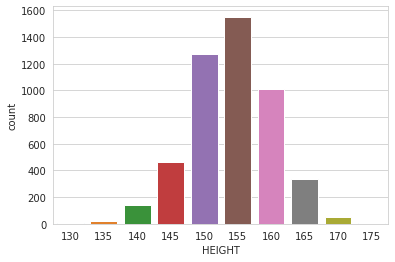

In [ ]:
sns.countplot(data = female, x = 'HEIGHT')

In [17]:
#남성
male = health[health.SEX=='M']
male

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD__DT
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN,12/29/2021
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,2020,9992,11,M,16,155,45,70.0,0.1,0.7,...,1.4,20.0,13.0,16.0,No,No,0,NaN,NaN,12/29/2021
9992,2020,9993,26,M,15,170,70,88.0,0.7,0.8,...,1.2,23.0,17.0,36.0,No,Yes,0,NaN,NaN,12/29/2021
9993,2020,9994,30,M,12,165,55,81.7,1.0,0.7,...,0.7,25.0,30.0,72.0,No,Yes,0,NaN,NaN,12/29/2021
9994,2020,9995,41,M,17,150,55,95.0,0.5,0.8,...,1.1,22.0,21.0,18.0,No,No,0,NaN,NaN,12/29/2021


In [18]:
male_height=male.groupby('HEIGHT', as_index = False).agg(n = ('HEIGHT', 'count'))
male_height

,HEIGHT,n
0,145,2
1,150,51
2,155,257
3,160,772
4,165,1503
5,170,1473
6,175,797
7,180,237
8,185,41
9,190,4


In [19]:
print(male_height.describe())

           HEIGHT            n
count   11.000000    11.000000
mean   170.000000   467.090909
std     16.583124   581.939766
min    145.000000     1.000000
25%    157.500000    22.500000
50%    170.000000   237.000000
75%    182.500000   784.500000
max    195.000000  1503.000000


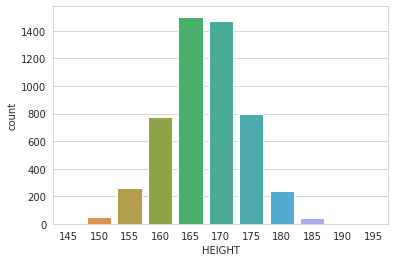

In [20]:
sns.countplot(data = male, x = 'HEIGHT')

해석

여성의 키를 그룹별로 살펴본 결과, 155그룹이 1553명으로 제일 많았으며 평균은 152.5다. 

또한, 가장 작은 키 그룹은 130으로 4명이 해당되며 가장 큰 키 그룹은 175으로 9명이 해당된다.

남성의 키를 그룹별로 살펴본 결과, 165그룹이 1503명으로 제일 많았으며 평균은 170이다.

또한, 가장 작은 키 그룹은 145로 2명이 해당되며 가장 큰 키 그룹은 195로 1명이 해당된다.

#공복혈당

In [97]:
di = health[health.BLDS>=126]
di

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD__DT
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
26,2020,27,42,M,11,170,75,87.0,1.5,1.0,...,0.8,37.0,29.0,20.0,NotNow,Yes,0,NaN,NaN,12/29/2021
45,2020,46,41,M,10,170,75,90.0,1.5,1.5,...,1.3,19.0,16.0,39.0,No,No,0,NaN,NaN,12/29/2021
60,2020,61,48,F,11,165,60,90.0,1.2,1.0,...,1.1,15.0,15.0,36.0,No,Yes,1,0.0,2.0,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,2020,9932,28,M,15,165,65,89.2,1.2,1.0,...,1.2,22.0,36.0,56.0,Yes,Yes,0,NaN,NaN,12/29/2021
9932,2020,9933,28,F,14,155,70,94.3,0.1,0.2,...,0.7,22.0,27.0,53.0,No,Yes,1,0.0,0.0,12/29/2021
9952,2020,9953,11,F,14,155,50,77.0,0.4,0.7,...,0.7,21.0,20.0,16.0,No,No,0,NaN,NaN,12/29/2021
9958,2020,9959,41,M,10,175,65,78.0,1.0,1.0,...,0.9,18.0,14.0,33.0,Yes,Yes,0,NaN,NaN,12/29/2021


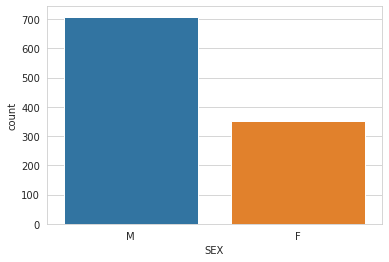

In [50]:
sns.countplot(data = di, x = 'SEX')

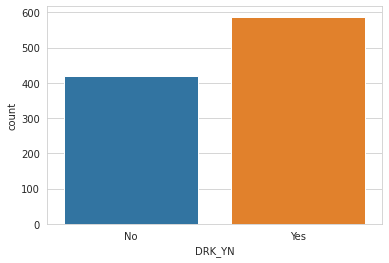

In [98]:
sns.countplot(data = di, x = 'DRK_YN')

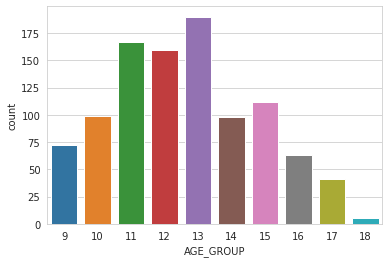

In [112]:
sns.countplot(data = di, x = 'AGE_GROUP')

In [121]:
not_diabetes=health[health.BLDS < 126 ]
not_diabetes

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD__DT
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


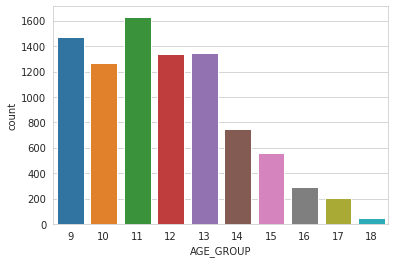

In [120]:
sns.countplot(data = not_diabetes, x = 'AGE_GROUP')

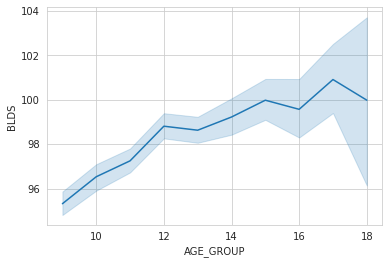

In [125]:
sns.lineplot(data = not_diabetes, x = 'AGE_GROUP', y = 'BLDS')

In [ ]:
df_ol = health.groupby('OLIG_PROTE_CD', as_index = False ).agg(BLDS = ('BLDS', 'mean'),
                                                               BP_HIGH = ('BP_HIGH', 'mean'),
                                                               BP_LWST = ('BP_LWST', 'mean'))
df_ol

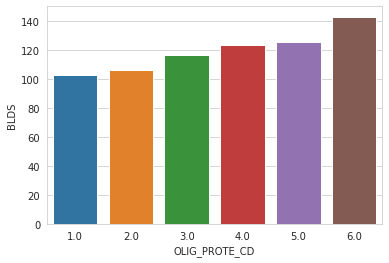

In [93]:
sns.barplot(data = df_ol, x = 'OLIG_PROTE_CD', y = 'BLDS')

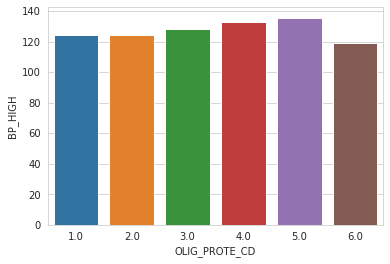

In [96]:
sns.barplot(data = df_ol, x = 'OLIG_PROTE_CD', y = 'BP_HIGH')

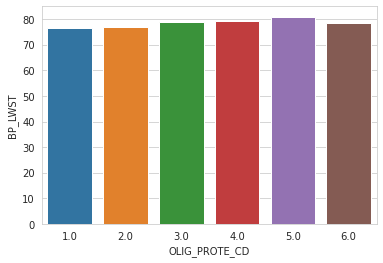

In [95]:
sns.barplot(data = df_ol, x = 'OLIG_PROTE_CD', y = 'BP_LWST')

해석
공복혈당이 126이상일 경우 대개 당뇨로 진단한다.
공복혈당이 126이상인 경우 남자가, 음주를 하는 경우가 더 많았으며, 60-64세가 가장 많았다. 

반면, 공복혈당이 126미만인 경우에는 50~54세가 가장 많았으며 나이가 많아질수록 빈도가 감소하는 경향을 보였다.

요단백 정도가 심할수록 그룹별 공복혈당 평균이 높았지만 그룹별 수축기, 이완기 혈압 평균은 비슷한 정도를 보였다.